In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

/Users/apple/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#Data preperation

In [4]:
data = [[[i+j]for i in range(5)] for j in range(100)]
target = [(i+5) for i in range(100)]

In [5]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)


In [6]:
data.shape

(100, 5, 1)

In [7]:
target.shape

(100,)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [9]:
#RNN model

In [14]:
model = Sequential()

In [25]:

model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=False))

In [26]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 1)              12        
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
3/3 [==============================] - 1s 109ms/step - loss: 56.6863 - accuracy: 0.0000e+00 - val_loss: 45.7471 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 56.6840 - accuracy: 0.0000e+00 - val_loss: 45.7448 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 56.6817 - accuracy: 0.0000e+00 - val_loss: 45.7425 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 56.6794 - accuracy: 0.0000e+00 - val_loss: 45.7401 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 56.6770 - accuracy: 0.0000e+00 - val_loss: 45.7377 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 56.6746 - accuracy: 0.0000e+00 - val_loss: 45.7352 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 56.6721 - accuracy: 0.0000e+00 - val_los

In [29]:
results = model.predict(x_test)

1/1 [==============================] - 0s 196ms/step


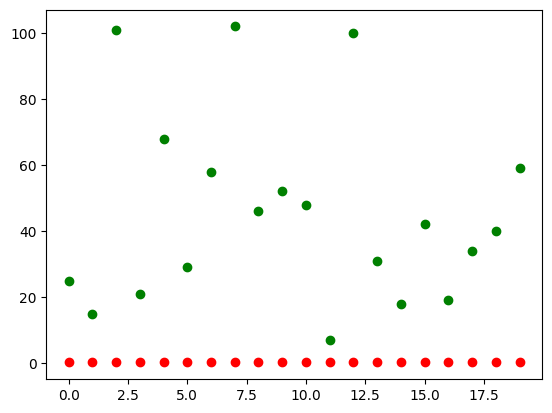

In [30]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()